# Бутстреп

---

# Расходы покупателей

Имеются размеры сумм в долларах, потраченных 50 покупателями в супермаркете. Мы готовы рассматривать это как SRS (Simple Random Sample) всех покупателей на этом рынке.     

In [14]:
import numpy as np
import seaborn as sns

spending = np.array([3.11, 8.88, 9.26, 10.81, 12.69, 13.78, 15.23, 15.62, 17.00, 17.39,
                    18.36, 18.43, 19.27, 19.50, 19.54, 20.16, 20.59, 22.22, 23.04, 24.47,
                    24.58, 25.13, 26.24, 26.26, 27.65, 28.06, 28.08, 28.38, 32.03, 34.98,
                    36.37, 38.64, 39.16, 41.02, 42.97, 44.08, 44.67, 45.40, 46.69, 48.65,
                    50.39, 52.75, 54.80, 59.07, 61.22, 70.32, 82.70, 85.76, 86.37, 93.34])

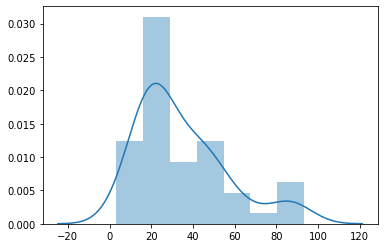

In [15]:
# The histogram is right-skewed.
sns.distplot(spending);

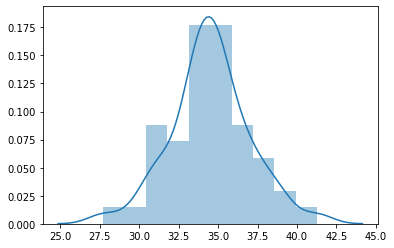

In [16]:
#The distribution is symmetric and bell-shaped; 
# while this amount of positive skewness would not be a concern in raw data, 
# here it occurs in a bootstrap distribution, 
# after the central limit theorem has had a chance to work. 
samples_boot = np.random.choice(spending, (len(spending), 50))
samples_boot = samples_boot.mean(axis=0)
sns.distplot(samples_boot);

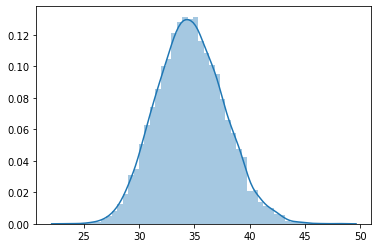

In [17]:
samples_boot = np.random.choice(spending, (len(spending), 10000), replace=True)
samples_boot = samples_boot.mean(axis=0)
sns.distplot(samples_boot);

---
## Доверительный интервал

### Percentile bootstrap

$(\theta^*_{(\alpha/2)}, \theta^*_{(1 - \alpha/2)})$, где $\theta^*_{(\alpha/2)}$ означает квантиль бутстреп-распределения статистики.

Способ построения доверительного интервала по квантилям бустреп-распределения статистики. Этот метод может быть применен к любой статистике. Он будет хорошо работать в тех случаях, когда распределение бутстрэпа симметрично и центрировано на наблюдаемой статистике.

6. Найдите 95% доверительный интервал для среднего $\mu$ генеральной совокупности, основываясь на ваших "псевдовыборках" по формуле выше. Оставьте 95% ваших наблюдений. Для этого от полученного бутстреп-распределения отсеките хвосты с помощью `np.quantile`

In [51]:
boot_n = int(1e4)

lst_boot_disrt = np.mean(np.random.choice(spending, (boot_n, spending.shape[0])), axis=1)

In [53]:
alpha = 0.05
ci = np.quantile(lst_boot_disrt, [alpha/2, (1 - alpha/2)])
ci

array([28.99114 , 40.864605])

In [57]:
# We are 95% confident that the mean for the population of shoppers’ spending is inside of the interval.